                                                                       TEMUULEN Bulgan - 2022427

### CCT College Dublin Continuous Assessment No.2
# AN ANALYSIS OF INDIAN FARMERS' PROTEST TWEETS.

#### Brief Introduction of the project:

1. For my second continuous assessment, I chose CSV format tweet dataset about Indian farmer's protest. This file contains over 1 million English-language tweets tweeted between November 1st, 2020 and november 21st, 2021, with the hashtag #FarmersProtest. It is downloaded from the Kaggle website with the CCO:Public Domain license.
(https://kaggle.com/datasets/prathamsharma123/farmers-protest-tweets-dataset-csv)

2. I divided my project into four primary sections (each subsectioon of these primary sections extensively discusses each stage in data processing and analysis). The sections are:
    1. Tools and Modules list
    2. Data Cleaning and Data Storage
    3. Pre-proccessing and Sentiment
    4. EDA and Forecast
    5. Databases and Comparison

3. Git was used for daily code tracking, and GitHub was used for archiving, monitoring, and sharing. Click the following link to view the project in GitHbub.

## 1. Tools and Modules list

In [1]:
import sys
import notebook
import subprocess
import re
import os
import nltk
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from autocorrect import Speller
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Checking the versions.
print('Python version is:', sys.version, '\n')
print('Jupyter Notebook version is:', notebook.__version__, '\n')

hdfs_version = subprocess.check_output(['hadoop', 'version']).decode('utf')
print('Hadoop version is:', hdfs_version, '\n')

git_version = subprocess.check_output(['git', '--version']).decode('utf')
print('Git version is:', git_version , '\n')


Python version is: 3.10.9 (main, Mar  1 2023, 18:23:06) [GCC 11.2.0] 

Jupyter Notebook version is: 6.5.2 

Hadoop version is: Hadoop 3.2.4
Source code repository Unknown -r 7e5d9983b388e372fe640f21f048f2f2ae6e9eba
Compiled by ubuntu on 2022-07-12T11:58Z
Compiled with protoc 2.5.0
From source with checksum ee031c16fe785bbb35252c749418712
This command was run using /usr/local/hadoop-3.2.4/share/hadoop/common/hadoop-common-3.2.4.jar
 

Git version is: git version 2.34.1
 



In [3]:
# Checking the version.
spark

For the project I used:

    1. Python: 3.10.9
    2. Jupyther Notebook: 6.5.2
    3. Hadoop: 3.2.4
    4. Spark: 3.2.4
    5. Git: 2.34.1

## 2. Data cleaning and data storage.

All the tweets are in English and were collected from Twitter.com from November 1st, 2020, to November 21st, 2021. The main subject matter of these tweets is the biggest anti-farm laws protest, which took place at the borders of the Indian national capital of New Delhi and was organized by a coalition of over 40 farmers from across the country. The dataset extraction process was done by Pratham Sharma, a Kaggle datasets expert who used the Twitter API and the snscrape Python library for collection. The tweets data consist of two separate CSVL files, 'tweets' and 'users', with a size of 1.7 GB and 81.2 MB, respectively. Checking the file size of the file.

In [4]:
# Checking the file size of the file.
file_size = os.path.getsize('/home/hduser/Desktop/ca/tweets.csv')/(1024*1024*1024)
print(f'The size of the tweets file is: {file_size:.2f} GB.')
file_size = os.path.getsize('/home/hduser/Desktop/ca/users.csv')/(1024*1024)
print(f'The size of the users file is: {file_size:.2f} MB.')

The size of the tweets file is: 1.69 GB.
The size of the users file is: 81.18 MB.


### 2.1. *Data storing and its preparation.*

Let's go through the files first and then decide what to do next.

#### *tweets.csv*

In [5]:
# Creating a DataFrame.
df_tweets = pd.read_csv('/home/hduser/Desktop/ca/tweets.csv')

# Checking the DataFrame.
df_tweets.head(2)

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ShashiRajbhar6/status/1376...,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,1.376739e+18,1.015970e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
1,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN


In [6]:
# Printing information about the DataFrame.
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084452 entries, 0 to 1084451
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   tweetUrl         1084452 non-null  object 
 1   date             1084452 non-null  object 
 2   renderedContent  1084452 non-null  object 
 3   tweetId          1084452 non-null  float64
 4   userId           1084452 non-null  float64
 5   replyCount       1084452 non-null  int64  
 6   retweetCount     1084452 non-null  int64  
 7   likeCount        1084452 non-null  int64  
 8   quoteCount       1084452 non-null  int64  
 9   source           1072318 non-null  object 
 10  media            319141 non-null   object 
 11  retweetedTweet   0 non-null        float64
 12  quotedTweet      286988 non-null   object 
 13  mentionedUsers   412206 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 115.8+ MB


The file 'tweets' has 14 columns and 1,084,452 rows. The most important information for analysis is in the column 'renderedContent', which contains the users' original tweets. From here,  I'll also use date information, reply counts, retweet counts, and like counts. The rest is not important.

#### *users.csv*

In [7]:
# Creating a DataFrame.
df_users = pd.read_csv('/home/hduser/Desktop/ca/users.csv')

# Checking the DataFrame.
df_users.head(2)

,username,displayname,userId,rawDescription,descriptionUrls,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl,profileImageUrl,profileBannerUrl,profileUrl
0,ShashiRajbhar6,Shashi Rajbhar,1.020000e+18,Satya presan 🤔ho Sakta but prajit💪 nhi\njhuth ...,[],False,2018-07-08T14:44:03+00:00,1788,1576,14396,26071,1,254,"Azm Uttar Pradesh, India",False,NaN,https://pbs.twimg.com/profile_images/135433129...,https://pbs.twimg.com/profile_banners/10159697...,https://twitter.com/ShashiRajbhar6
1,kaursuk06272818,KAUR SUKH🌾ਕੌਰ ਸੁਖ,1.330000e+18,ਜਿਓਣਾ ਕੀ ਸਰੀਰਾਂ ਦਾ ਜੇਕਰ ਹੋਣ ਜ਼ਮੀਰਾਂ ਮਰੀਆਂ 🌼,[],False,2020-11-29T06:40:06+00:00,51,68,1338,3676,0,607,NaN,False,NaN,https://pbs.twimg.com/profile_images/133295149...,https://pbs.twimg.com/profile_banners/13329372...,https://twitter.com/kaursuk06272818


In [8]:
# Printing information about the DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235660 entries, 0 to 235659
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   username          235660 non-null  object 
 1   displayname       235625 non-null  object 
 2   userId            235660 non-null  float64
 3   rawDescription    190546 non-null  object 
 4   descriptionUrls   162616 non-null  object 
 5   verified          235660 non-null  bool   
 6   created           235660 non-null  object 
 7   followersCount    235660 non-null  int64  
 8   friendsCount      235660 non-null  int64  
 9   statusesCount     235660 non-null  int64  
 10  favouritesCount   235660 non-null  int64  
 11  listedCount       235660 non-null  int64  
 12  mediaCount        235660 non-null  int64  
 13  location          152110 non-null  object 
 14  protected         235660 non-null  bool   
 15  linkUrl           49700 non-null   object 
 16  profileImageUrl   23

The file 'users' has 18 columns and 235,660 rows. These columns are optional because they only provide information about the users. I can only use the column 'displayname' from this file instead of 'userId' from the 'tweets' file, which only contains numbers that are not very comprehensible from the perspective of who posted that tweet.

Let's start by removing columns that contain no necessary data.

In [9]:
# Deleting columns from the DataFrame of tweets.
df_tweets = df_tweets.drop(labels=['tweetUrl', 'tweetId', 'source', 'media', 'retweetedTweet', 'quotedTweet', \
                                   'mentionedUsers', 'quoteCount', 'replyCount'], axis=1)

# Checking the changes.
df_tweets.head(2)

,date,renderedContent,userId,retweetCount,likeCount
0,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,1.015970e+18,0,0
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,1.332937e+18,0,0


In [10]:
# Deleting columns from the DataFrame of tweets.
df_users = df_users[['displayname', 'userId']]

# Checking the changes.
df_users.head(2)

,displayname,userId
0,Shashi Rajbhar,1.020000e+18
1,KAUR SUKH🌾ਕੌਰ ਸੁਖ,1.330000e+18


Succefully deleted the columns and now I'll merge two files with <merge()> function.

In [11]:
# Performing left merging on two DataFrames.
df_final = pd.merge(df_tweets, df_users, on='userId', how='left')

# Deleting the column 'userId'.
df_final = df_final.drop(labels=['userId'], axis=1)

# Checking the changes.
df_final.head(10)

,date,renderedContent,retweetCount,likeCount,displayname
0,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,0,0,NaN
1,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,0,0,NaN
2,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,0,0,NaN
3,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1,3,Sukhdev Singh
4,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the...",0,1,NaN
5,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,0,0,Abhimanyu 🌏 🇮🇳
6,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,0,0,Abhimanyu 🌏 🇮🇳
7,2021-03-30 03:28:50+00:00,Lets not forget that our Farmers are STILL out...,2,3,Japneet Singh
8,2021-03-30 03:28:49+00:00,@Troll48611422 @Doabapunjab1 @Terminator00096 ...,0,0,NaN
9,2021-03-30 03:28:09+00:00,"Neutrality helps the oppressor, never the vict...",0,0,Kisan Bot🚜🌾


I combined two data frames and deleted all unnecessary columns. Now I'm going to save it to my Ubuntu VM as a CSV file.

In [12]:
# Saving the DataFrame as 'new_tweets.csv' on my VM with the utf-8 Encoding.
df_final.to_csv('/home/hduser/Desktop/ca/new_tweets.csv', encoding='utf-8', index=False)

In [13]:
# Checking the file size.
new_file_size = os.path.getsize('/home/hduser/Desktop/ca/new_tweets.csv')/(1024*1024)
print(f'The size of new tweet file is: {new_file_size:.2f} MB.')

The size of new tweet file is: 658.84 MB.


The file size has been decreased from 1.7GB to 659 MB, but the importand information about the tweets remains for further processing. I chose to save my newly created Twitter CSV dataset to HDFS, from where I will execute data processing in a distributed environment using PySpark tools.

### 1.2 *Data cleaning and manipulation.*

This section is dedicated to PySpark. I experimented with PySpark functions and techniques to manipulate and clean my newly created tweet dataset, which is now stored in HDFS's 'ca2' directory. I'll begin by generating a Spark session and a PySpark data frame.

In [14]:
# Starting a new SparkSession for data import from HDFS.
spark = SparkSession.builder \
        .appName('Sentiment Forecast') \
        .getOrCreate()

In [15]:
# Reading the file.
df_spark = spark.read.option('header', 'true') \
                        .option('multiline', 'true') \
                        .option('quote', "\"") \
                        .option('escape', "\"") \
                        .csv('/ca2/new_tweets.csv')

The data frame called 'df_spark' is now successfully created and ready for cleaning and manipulation.

#### *columns*

Lets check all the columns and its datatype.

In [16]:
# Checking the contents of the DataFrame.
df_spark.show(10)

+--------------------+--------------------+------------+---------+-----------------+
|                date|     renderedContent|retweetCount|likeCount|      displayname|
+--------------------+--------------------+------------+---------+-----------------+
|2021-03-30 03:33:...|Support 👇\n\n#Fa...|           0|        0|             null|
|2021-03-30 03:33:...|Supporting farmer...|           0|        0|             null|
|2021-03-30 03:31:...|Support farmers i...|           0|        0|             null|
|2021-03-30 03:30:...|#StopHateAgainstF...|           1|        3|    Sukhdev Singh|
|2021-03-30 03:30:...|You hate farmers ...|           0|        1|             null|
|2021-03-30 03:29:...|They can't be far...|           0|        0|Abhimanyu 🌏 🇮🇳|
|2021-03-30 03:29:...|They can't be far...|           0|        0|Abhimanyu 🌏 🇮🇳|
|2021-03-30 03:28:...|Lets not forget t...|           2|        3|    Japneet Singh|
|2021-03-30 03:28:...|@Troll48611422 @D...|           0|        0|      

In [17]:
# Checking the columns of the DataFrame
x = 0
columns = ''
while x < len(df_spark.columns):
    columns += df_spark.columns[x] + ', '
    x += 1
print('Columns of the DataFrame are:', columns)

Columns of the DataFrame are: date, renderedContent, retweetCount, likeCount, displayname, 


In [18]:
# Checking column dtypes.
df_spark.printSchema()

root
 |-- date: string (nullable = true)
 |-- renderedContent: string (nullable = true)
 |-- retweetCount: string (nullable = true)
 |-- likeCount: string (nullable = true)
 |-- displayname: string (nullable = true)



I examined the DataFrame's columns and discovered that, because it was imported from a CSV file, all 5 columns contained string dtype values. I'll change the names of the columns and the dtypes of the column values to make it easier to use.

In [19]:
# Renaming the columns.
df_spark = df_spark.select(col('date').alias('date'),
                           col('displayname').alias('user'),
                           col('renderedContent').alias('tweet'),
                           col('retweetCount').alias('retweeted'),
                           col('likeCount').alias('liked'))

In [20]:
# Changing dtypes.
#df_spark = df_spark.withColumn('date',to_timestamp(col('date').cast(TimestampType())))
df_spark = df_spark.withColumn('tweet',col('tweet').cast(StringType()))
df_spark = df_spark.withColumn('user',col('user').cast(StringType()))
df_spark = df_spark.withColumn('retweeted',col('retweeted').cast('integer'))
df_spark = df_spark.withColumn('liked',col('liked').cast('integer'))

In [21]:
# Checking changes.
df_spark.show(2)

+--------------------+----+--------------------+---------+-----+
|                date|user|               tweet|retweeted|liked|
+--------------------+----+--------------------+---------+-----+
|2021-03-30 03:33:...|null|Support 👇\n\n#Fa...|        0|    0|
|2021-03-30 03:33:...|null|Supporting farmer...|        0|    0|
+--------------------+----+--------------------+---------+-----+
only showing top 2 rows



In [22]:
# Checking changes.
df_spark.printSchema()

root
 |-- date: string (nullable = true)
 |-- user: string (nullable = true)
 |-- tweet: string (nullable = true)
 |-- retweeted: integer (nullable = true)
 |-- liked: integer (nullable = true)



Now all the column values have the appropriate data format, as well as the names of the columns are short and precise.

#### *null values and duplicates*

The second thing I'd like to do for cleaning is to remove duplicates and null values.

In [23]:
# Examining the shape of the DataFrame
print('The DataFrame consists of', len(df_spark.columns), 'columns and', df_spark.count(), 'rows.')

The DataFrame consists of 5 columns and 2953850 rows.


There are 2.953.850 rows and five columns in the data frame. And, as can be seen from the 'show()' method called above on cell number sixteen, there are numerous duplicates on it, which I would like to remove. 

Furthermore, the new combined column 'displayname' has some NaN values. Some users who tweet on Twitter don't have a Display Name. It might indicate that they no longer use the social media platform, or that they have been blocked due to trolling, or perhaps the account has been removed for whatever reason. So, to avoid bias and wasting memory on extra processing, I removed the rows that do not have the display name or contain duplicate tweet entries.

Following these adjustments, I'll sort the table contents by date.

In [24]:
# Dropping the duplicates and rows with 'null' values then sorting the rows.
df_spark = df_spark.drop_duplicates()
df_spark = df_spark.filter(col('displayname').isNotNull())
df_spark = df_spark.orderBy('date')

In [25]:
# Checking the changes.
df_spark.show(10)

+--------------------+--------------------+--------------------+---------+-----+
|                date|                user|               tweet|retweeted|liked|
+--------------------+--------------------+--------------------+---------+-----+
|2020-11-01 03:36:...|Manickam Tagore ....|Yesterday in a pu...|       95|  389|
|2020-11-01 10:54:...|        ClaireDeLune|Has this been rep...|        0|    1|
|2020-11-01 12:10:...|          Rajay Deep|Such a shame!\n\n...|        0|    2|
|2020-11-01 23:55:...|          OnTheFritz|@WhiteHouse @real...|        0|    3|
|2020-11-02 02:28:...|Fateh Singh  Bhullar|Other side of APM...|        0|    1|
|2020-11-02 06:59:...|IndoAsianCommodities|Given #FarmersPro...|        0|    0|
|2020-11-02 14:42:...|     pravingandhino1|.@asadowaisi \nTh...|        0|    0|
|2020-11-02 15:06:...|   Vishal Maheshwari|@narendramodi Ver...|        0|    0|
|2020-11-02 16:33:...|         Bimal Jaggi|#GujjarReservatio...|        0|    1|
|2020-11-03 04:32:...|      

In [26]:
# Checking the changes.
print('The DataFrame consists of', len(df_spark.columns), 'columns and', df_spark.count(), 'rows.')

The DataFrame consists of 5 columns and 1082411 rows.


In [27]:
# Checking null values on entire DataFrame.
df_spark.filter(col('date').isNull() | col('user').isNull() | col('tweet').isNull() | \
                col('retweeted').isNull() | col('liked').isNull()).show()

+----+----+-----+---------+-----+
|date|user|tweet|retweeted|liked|
+----+----+-----+---------+-----+
+----+----+-----+---------+-----+



Now the DataFrame shape is 1.082.411 x 5. There are no dublicates and no null values, it is now clean and clear.

#### *the column 'tweet'*

The tweets column contains the most important information for sentiment analysis. Let's start by removing tags, hashtags, emails, and links from the tweets because I want to focus on the text itself rather than the extra information. These additional contexts have no direct impact on the sentiment of the tweet.

In [28]:
# Removing tags, hashtags, emails, and website links from the values of the column 'tweet'.
df_spark = df_spark.withColumn('tweet', regexp_replace('tweet', r'@\w+|#\S+|\S+@\S+|http\S+|www\S+|\S+/\S+', ''))

In [29]:
# Checking changes.
df_spark.select('tweet').orderBy('tweet', ascending=False).limit(10).show(10, False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|tweet                                                                                                                                                                                                                                                                  |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|🧵appalled by the academics RT’ing India’s covid surge while still clueless about  India blocked protestors out of their own capitol &amp; will now argue that protestors are creating barriers to emergen

Emails, URLs, tags, and hashtags from the 'tweet' column values were successfully removed. However, from the above cell, I can see that the column 'tweet" still requires some cleaning. Further, I will eliminate preceding and trailing whitespaces, '&' character reference for an ampersand, punctuation marks, and non-English texts from the string value of the column. Then, I'll replace two or more continuous whitespaces with a single whitespace and replace the new line and tab with ' '. And lastly, I'll lowercase the entire string for each column value.

In [30]:
# Extra cleaning for the 'tweet' column values
df_spark = df_spark.withColumn('tweet', trim(df_spark.tweet))
df_spark = df_spark.withColumn('tweet', regexp_replace('tweet', r'\b\w{0,1}\b', ''))
df_spark = df_spark.withColumn('tweet', regexp_replace('tweet', '&amp', ' '))
df_spark = df_spark.withColumn('tweet', regexp_replace('tweet', '[\|,.;:\?!_+-]', ' '))
df_spark = df_spark.withColumn('tweet', regexp_replace('tweet', r'\s{2,}', ' '))
df_spark = df_spark.withColumn('tweet', regexp_replace('tweet', r'\n|\t', ' '))
df_spark = df_spark.withColumn('tweet', regexp_replace('tweet', "[^a-zA-Z0-9!@#$%^&*()_+\-={}\[\]|\\;:'\",.<>/?~` ]", ''))
df_spark = df_spark.withColumn('tweet', lower(df_spark.tweet))

In [31]:
# Checking changes.
df_spark.select('tweet').show(10, False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|tweet                                                                                                                                                                                                        |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|yesterday in public meeting alleged that leader staged managed protest of farmer by burning his own crop field today vaartha front page news covered in chandrasekar garu home district now what you will say|
|has this been reported on msm or are they ignoring this                                                                                                                

Ok, the cleaning is done and it looks fine. I'll safe this DataFrame to HDFS as CSV file. 

In [32]:
# Saving the DataFrame to HDFS.
#df_spark.write.format('csv').save('hdfs://localhost:9000/ca2/tweets')

## 3. Pre-proccessing and Sentiment

Because I'm using the protest tweet data set, it's obvious that a signicant number of tweets will have a negative tone of writing. Most people were on the protester's side, which can be seen from reading the clean tweets file downloaded from HDFS. It was impossible to determine sentiment and analyze the event.It was impossible to determine sentiment and analyze the event. 

That's why my decision was to choose the proper user and focus only on that user's sentiment change to better understand the protest. And to be honest, I didn’t believe that all of the users who tweeted about the demonstration were real people. I observed some accounts on Twitter.com, but some were active only during the protest, and some didn't even exist. I believe there were bots running tweets behind the scenes to draw individuals' or foreign media's attention to the protest.

In [33]:
# The count of the most tweets from the users.
df_spark.groupBy('user').count().sort('count', ascending=False).show()

+--------------------+-----+
|                user|count|
+--------------------+-----+
|  The Pacifist Rebel| 7766|
|       Kisan Bot🚜🌾| 7338|
| ਸਰਦਾਰ ਸਾਬ(A Farmer)| 5020|
|ਕਿਸਾਨAndolajivi R...| 4107|
|ਕਿਸਾਨAndolajivi r...| 4107|
|             Navneet| 3707|
|       Navneet Jammu| 3659|
|          IndiaToday| 3479|
|           🍊raman🚜| 3336|
|                 Jot| 3235|
|PARSHOTAM SINGH S...| 3210|
|Jaz 🇨🇦🌾 ਗਰਮ ਖਿਆਲੀ| 3052|
|     Manminder Singh| 2563|
|For love of Punja...| 2547|
|Jaspal Kaur Bains...| 2547|
|    Kuldeep Dhaliwal| 2547|
|                John| 2489|
|ਤਕਦੀਰ ਕੌਰ 🇺🇸 ਦੁਆਬਣ| 2480|
|    Er. V P Vashisht| 2437|
|    Shivinder Thakur| 2428|
+--------------------+-----+
only showing top 20 rows



My suggestion was correct: two accounts starting with @ਕਿਸਾਨAndolajivi have identical names and an equal amount of tweets; three accounts starting with usernames @For, @Jaspal, and @Kuldeep have the same number of tweets. They can't be actual people or organizations. They are bots or groups of people consciously trying to influence others.

Looking at their Twitter pages, I couldn't determine which to choose, but I'm sure it is @IndiaToday or @KuldeepDhaliwal. Both accounts are verified and have a good amount of tweets. Let's examine both and decide.

In [34]:
# Checking tweets of the account @IndiaToday.
df_spark.filter(col('user').like('%IndiaToday%')).show(10)

+--------------------+----------+--------------------+---------+-----+
|                date|      user|               tweet|retweeted|liked|
+--------------------+----------+--------------------+---------+-----+
|2020-11-21 11:04:...|IndiaToday|farmers allow tra...|        1|   17|
|2020-11-25 09:38:...|IndiaToday|police resorted t...|        2|   13|
|2020-11-26 04:14:...|IndiaToday|heavy police depl...|        2|    8|
|2020-11-26 05:04:...|IndiaToday|farmers on warpat...|        5|   16|
|2020-11-26 05:07:...|IndiaToday|rapid action forc...|        4|   20|
|2020-11-26 05:13:...|IndiaToday|cranes drones bar...|        4|   19|
|2020-11-26 05:21:...|IndiaToday|situation tense a...|        6|   19|
|2020-11-26 05:27:...|IndiaToday|cops use water ca...|        4|   19|
|2020-11-26 05:29:...|IndiaToday|agitating farmers...|        4|   19|
|2020-11-26 05:44:...|IndiaToday|haryana punjab bo...|       10|   19|
+--------------------+----------+--------------------+---------+-----+
only s

In [35]:
# Checking tweets of the account @Kuldeep Dhaliwal.
df_spark.filter(col('user').like('%Kuldeep Dhaliwal%')).show(10)

+--------------------+----------------+--------------------+---------+-----+
|                date|            user|               tweet|retweeted|liked|
+--------------------+----------------+--------------------+---------+-----+
|2020-12-05 08:02:...|Kuldeep Dhaliwal|respect for stand...|        0|    0|
|2020-12-09 20:47:...|Kuldeep Dhaliwal|scene of high spi...|        1|    1|
|2020-12-13 12:16:...|Kuldeep Dhaliwal|blame gandhi for ...|        0|    0|
|2020-12-13 12:17:...|Kuldeep Dhaliwal|blame gandhi for ...|        0|    0|
|2020-12-13 12:18:...|Kuldeep Dhaliwal|blame gandhi for ...|        0|    0|
|2020-12-13 12:19:...|Kuldeep Dhaliwal|blame gandhi for ...|        0|    0|
|2020-12-13 12:21:...|Kuldeep Dhaliwal|blame gandhi for ...|        0|    0|
|2020-12-13 12:21:...|Kuldeep Dhaliwal|blame gandhi for ...|        0|    0|
|2020-12-21 09:01:...|Kuldeep Dhaliwal|if only governmen...|        0|    0|
|2020-12-21 10:03:...|Kuldeep Dhaliwal|these are singha ...|        0|    0|

As I can see from the above-executed two cells, it is better to stick with the account @IndiaToday because @KuldeepDhaliwal has fewer tweets, started later, and most significantly, has the same tweet repeated again and again. Let's separate the tweets related to @IndiaToday and do more analysis.

In [36]:
# Creating a DataFrame.
df_for_sentiment = df_spark.filter(col('user').like('%IndiaToday%'))

In [37]:
# Checking the results.
df_for_sentiment.show(3)

+--------------------+----------+--------------------+---------+-----+
|                date|      user|               tweet|retweeted|liked|
+--------------------+----------+--------------------+---------+-----+
|2020-11-21 11:04:...|IndiaToday|farmers allow tra...|        1|   17|
|2020-11-25 09:38:...|IndiaToday|police resorted t...|        2|   13|
|2020-11-26 04:14:...|IndiaToday|heavy police depl...|        2|    8|
+--------------------+----------+--------------------+---------+-----+
only showing top 3 rows



In [38]:
# Examining the shape of the DataFrame.
print('The DataFrame consists of', len(df_for_sentiment.columns), 'columns and', df_for_sentiment.count(), 'rows.')

The DataFrame consists of 5 columns and 3479 rows.


My newly created data frame now has the tweets only from the account @IndiaToday and has 3479 tweets and four other columns of information. It is ready for sentiment pre-processing.

### 3.1 *Tokenization*

The first stage of the preprocessing is the tokenization of the tweets column, using the 'Tokenizer' class from the 'pyspark.ml.feature' module. It will split the text into distinct tokens based on the default delimiter, in this case, is 'whitespace'. 

In [39]:
# Splitting tweet strings into tokenized text.
tokenizer = Tokenizer(inputCol='tweet', outputCol='token')
df_for_sentiment = tokenizer.transform(df_for_sentiment)

In [40]:
# Checking the changes.
df_for_sentiment.show(3)

+--------------------+----------+--------------------+---------+-----+--------------------+
|                date|      user|               tweet|retweeted|liked|               token|
+--------------------+----------+--------------------+---------+-----+--------------------+
|2020-11-21 11:04:...|IndiaToday|farmers allow tra...|        1|   17|[farmers, allow, ...|
|2020-11-25 09:38:...|IndiaToday|police resorted t...|        2|   13|[police, resorted...|
|2020-11-26 04:14:...|IndiaToday|heavy police depl...|        2|    8|[heavy, police, d...|
+--------------------+----------+--------------------+---------+-----+--------------------+
only showing top 3 rows



In [41]:
# Closer look to the column.
df_for_sentiment.select('token').show(10, False)

+-------------------------------------------------------------------------------------------------------------------------------------------+
|token                                                                                                                                      |
+-------------------------------------------------------------------------------------------------------------------------------------------+
|[farmers, allow, trains, to, resume, with, warning, )]                                                                                     |
|[police, resorted, to, use, of, water, cannons, to, disperse, farmers, gathered, near, chandigarh, delhi, highway]                         |
|[heavy, police, deployment, at, delhi, border, as, farmers, call, for, bandh]                                                              |
|[farmers, on, warpath, cops, use, water, cannon, tear, gas, on, patiala, ambala, highway]                                                  |
|[rapi

### *3.2 Stop word removal*


I now have a new column called token' with tokenized text on it, and when I look closely at the text in it, there are a lot of words that are not particularly relevant in further processing. Since they do not contain substantial significance or contribute to a text's sentiment, I will eliminate noise and focus on the more meaningful words by deleting them.

In [42]:
# Removing stop words from token text.
stopwords = StopWordsRemover.loadDefaultStopWords('english')
remover = StopWordsRemover(inputCol='token', outputCol='clean_token', stopWords=stopwords)
df_for_sentiment = remover.transform(df_for_sentiment)

In [43]:
# Checking the changes.
df_for_sentiment.select('clean_token').show(3, False)

+------------------------------------------------------------------------------------------------------+
|clean_token                                                                                           |
+------------------------------------------------------------------------------------------------------+
|[farmers, allow, trains, resume, warning, )]                                                          |
|[police, resorted, use, water, cannons, disperse, farmers, gathered, near, chandigarh, delhi, highway]|
|[heavy, police, deployment, delhi, border, farmers, call, bandh]                                      |
+------------------------------------------------------------------------------------------------------+
only showing top 3 rows



In [44]:
# Checking stop words list for PySpark.ML.
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

### *3.3 Spellcheck and lemmatization on Pandas*

I did tokenization and stop-word removal on the PySpark data frame. However, it lacks libraries for spell-checking and lemmatization. There shouldn't be any grammatical errors in the text because it comes from one of the top news publications' official Twitter pages. But, to be sure and out of curiosity, I tried each of those techniques on a Pandas data frame. Before doing it on Pandas, I explored many alternative libraries, including spell-check and lemmatization facilities. But all of them didn't function with PySpark. There were several JavaScript issues in the execution process. Some libraries experienced library import errors, some libraries discontinued development of the tool for PySpark, etc.

In [45]:
# Checking the DataFrame
df_for_sentiment.show(3)

+--------------------+----------+--------------------+---------+-----+--------------------+--------------------+
|                date|      user|               tweet|retweeted|liked|               token|         clean_token|
+--------------------+----------+--------------------+---------+-----+--------------------+--------------------+
|2020-11-21 11:04:...|IndiaToday|farmers allow tra...|        1|   17|[farmers, allow, ...|[farmers, allow, ...|
|2020-11-25 09:38:...|IndiaToday|police resorted t...|        2|   13|[police, resorted...|[police, resorted...|
|2020-11-26 04:14:...|IndiaToday|heavy police depl...|        2|    8|[heavy, police, d...|[heavy, police, d...|
+--------------------+----------+--------------------+---------+-----+--------------------+--------------------+
only showing top 3 rows



In [46]:
# Creating new DataFrame for Pandas
df_for_pandas = df_for_sentiment.select('date', 'tweet', 'clean_token', 'retweeted', 'liked')

# Converting the values of the 'date' column to strings.
df_for_pandas = df_for_sentiment.withColumn('date', col('date').cast('string'))
df_for_pandas = df_for_sentiment.withColumn('tweet', col('tweet').cast('string'))
df_for_pandas = df_for_sentiment.withColumn('clean_token', col('clean_token').cast('string'))
df_for_pandas = df_for_sentiment.withColumn('retweeted', col('retweeted').cast('string'))
df_for_pandas = df_for_sentiment.withColumn('liked', col('liked').cast('string'))

# Using all column Pandas but not including the column'token'.
df_for_pandas = df_for_pandas.select('date', 'tweet', 'clean_token', 'retweeted', 'liked')

# Conversion from Pyspark to Pandas
df_pandas = df_for_pandas.toPandas()

In [47]:
# Checking the changes
df_pandas.head(3)

,date,tweet,clean_token,retweeted,liked
0,2020-11-21 11:04:03+00:00,farmers allow trains to resume with warning ),"[farmers, allow, trains, resume, warning, )]",1,17
1,2020-11-25 09:38:38+00:00,police resorted to use of water cannons to dis...,"[police, resorted, use, water, cannons, disper...",2,13
2,2020-11-26 04:14:59+00:00,heavy police deployment at delhi border as far...,"[heavy, police, deployment, delhi, border, far...",2,8


As I already mentioned, I'm trying to keep the column of dates along with the column of tweets because processing tweets independently will result in the loss of the order that I'm trying to maintain for future processing. In this case, I'm also keeping a tweet column to compare changes to the outcome.

#### *spellcheck*

In [48]:
# Initializing the spell checker.
spell = Speller()

In [49]:
# Defining a function to perform spell checking on a single token.
def spell_check_token(token):
    return spell(str(token))

# Executing correction.
df_pandas['corrected_token'] = df_pandas['clean_token'].apply(spell_check_token)

In [50]:
# Checking the changes
df_pandas.head(3)

,date,tweet,clean_token,retweeted,liked,corrected_token
0,2020-11-21 11:04:03+00:00,farmers allow trains to resume with warning ),"[farmers, allow, trains, resume, warning, )]",1,17,"['farmers', 'allow', 'trains', 'resume', 'warn..."
1,2020-11-25 09:38:38+00:00,police resorted to use of water cannons to dis...,"[police, resorted, use, water, cannons, disper...",2,13,"['police', 'resorted', 'use', 'water', 'cannon..."
2,2020-11-26 04:14:59+00:00,heavy police deployment at delhi border as far...,"[heavy, police, deployment, delhi, border, far...",2,8,"['heavy', 'police', 'deployment', 'delhi', 'bo..."


A had standardized the spelling across the tweet.

#### *lemmatization*

Lemmatization is a natural language processing approach that reduces words to their base or dictionary form. It is, in my opinion, one of the most important elements of pre-processing. You must do it right. Otherwise, the meaning could be misinterpreted, and the sentiment's outcome would be incorrect. But fortunately, in my instance, the tweets are in official written form, so there can't be any bias in this situation.

In [51]:
# Downloading the WordNet Module in my program.
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/hduser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
# Initializing the lemmatizer.
lemmatizer = WordNetLemmatizer()

In [53]:
# Preprocessing the text of the 'corrected_token' column.
def converter_str_clear(val):
    new_val = re.sub(r'\W+', ' ', val)
    return_val = new_val.split()
    return return_val
df_pandas['corrected_token'] = df_pandas['corrected_token'].apply(converter_str_clear)

# Executing lemmatizer.
df_pandas['last_token'] = df_pandas['corrected_token'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [54]:
# Checking the changes.
df_pandas.head(1)

,date,tweet,clean_token,retweeted,liked,corrected_token,last_token
0,2020-11-21 11:04:03+00:00,farmers allow trains to resume with warning ),"[farmers, allow, trains, resume, warning, )]",1,17,"[farmers, allow, trains, resume, warning]","[farmer, allow, train, resume, warning]"


In [55]:
# Dropping columns 'clean_token' and 'corrected_token'.
df_pandas = df_pandas[['date', 'tweet', 'last_token', 'retweeted', 'liked']]

# Saving the DataFrame as 'df_for_sentiment.csv' on my VM with the utf-8 Encoding.
df_pandas.to_csv('/home/hduser/Desktop/ca/for_sentiment.csv', encoding='utf-8', index=False)

I successfully completed spell-checking and lemmatization for the tweet tokens in the cells above. The final data were saved as a CSV file and uploaded to HDFS, where I will use PySpark again to complete the further preprocessing.

### *3.4 Polarity scoring*

In this stage, I'll use 'SentimentIntensityAnalyzer' to compute the overall sentiment intensity of the text by aggregating the polarity scores of all the tweet's words. I'm confident this method will produce decent results because I've done text cleaning, stop word removal, spell checking, and lemmatization.

In [56]:
# Importing the dataset from HDFS.
df_spark_sentiment = spark.read.option('header', 'true') \
                        .option('multiline', 'true') \
                        .option('quote', "\"") \
                        .option('escape', "\"") \
                        .csv('/ca2/for_sentiment.csv')


df_spark_sentiment = df_spark_sentiment.withColumn('last_token', regexp_replace('last_token', r'\W+', ' ',))
df_spark_sentiment = df_spark_sentiment.withColumn('last_token', trim(df_spark_sentiment.last_token))

# Checking the new created DataFrame.
df_spark_sentiment.show(10)

+--------------------+--------------------+--------------------+---------+-----+
|                date|               tweet|          last_token|retweeted|liked|
+--------------------+--------------------+--------------------+---------+-----+
|2020-11-21 11:04:...|farmers allow tra...|farmer allow trai...|        1|   17|
|2020-11-25 09:38:...|police resorted t...|police resorted u...|        2|   13|
|2020-11-26 04:14:...|heavy police depl...|heavy police depl...|        2|    8|
|2020-11-26 05:04:...|farmers on warpat...|farmer wrath cop ...|        5|   16|
|2020-11-26 05:07:...|rapid action forc...|rapid action forc...|        4|   20|
|2020-11-26 05:13:...|cranes drones bar...|crane drone barri...|        4|   19|
|2020-11-26 05:21:...|situation tense a...|situation tense f...|        6|   19|
|2020-11-26 05:27:...|cops use water ca...|cop use water can...|        4|   19|
|2020-11-26 05:29:...|agitating farmers...|agitation farmer ...|        4|   19|
|2020-11-26 05:44:...|haryan

In [57]:
# Creating a custom function.
def calculate_polarity(text):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(text)['compound']
    return polarity

# Calculating the polarity.
calculate_polarity_udf = udf(calculate_polarity)
df_spark_sentiment = df_spark_sentiment.withColumn('sentiment_polarity', calculate_polarity_udf(df_spark_sentiment['last_token']))

In [58]:
# Checking the results.
df_spark_sentiment.show(10)

+--------------------+--------------------+--------------------+---------+-----+------------------+
|                date|               tweet|          last_token|retweeted|liked|sentiment_polarity|
+--------------------+--------------------+--------------------+---------+-----+------------------+
|2020-11-21 11:04:...|farmers allow tra...|farmer allow trai...|        1|   17|            -0.128|
|2020-11-25 09:38:...|police resorted t...|police resorted u...|        2|   13|               0.0|
|2020-11-26 04:14:...|heavy police depl...|heavy police depl...|        2|    8|               0.0|
|2020-11-26 05:04:...|farmers on warpat...|farmer wrath cop ...|        5|   16|               0.0|
|2020-11-26 05:07:...|rapid action forc...|rapid action forc...|        4|   20|           -0.4404|
|2020-11-26 05:13:...|cranes drones bar...|crane drone barri...|        4|   19|            0.3612|
|2020-11-26 05:21:...|situation tense a...|situation tense f...|        6|   19|           -0.5574|


Because I now know the sentiment polarity, I can use that to generate the sentiment column. And I chose the negative number, including the 0 because, because the protest isn't an optimistic event. I would say most tweets would have a negative tone of writing, and the 0 value in this case may also indicate negative sentiment.

In [59]:
# Creating a new column 'polarity' based on the polarity threshold.
threshold = 0.0
df_spark_sentiment = df_spark_sentiment.withColumn('sentiment', when(df_spark_sentiment.sentiment_polarity > threshold, 'positive')
                                                  .otherwise('negative'))

In [60]:
# Checking the results.                                                   
df_spark_sentiment.show(10)

+--------------------+--------------------+--------------------+---------+-----+------------------+---------+
|                date|               tweet|          last_token|retweeted|liked|sentiment_polarity|sentiment|
+--------------------+--------------------+--------------------+---------+-----+------------------+---------+
|2020-11-21 11:04:...|farmers allow tra...|farmer allow trai...|        1|   17|            -0.128| negative|
|2020-11-25 09:38:...|police resorted t...|police resorted u...|        2|   13|               0.0| negative|
|2020-11-26 04:14:...|heavy police depl...|heavy police depl...|        2|    8|               0.0| negative|
|2020-11-26 05:04:...|farmers on warpat...|farmer wrath cop ...|        5|   16|               0.0| negative|
|2020-11-26 05:07:...|rapid action forc...|rapid action forc...|        4|   20|           -0.4404| negative|
|2020-11-26 05:13:...|cranes drones bar...|crane drone barri...|        4|   19|            0.3612| positive|
|2020-11-2

### 3.5 Sentimental analysis model in Pyspark.

I selected to train a Logistic Regression model to see whether my sentiment was effective. I can verify the pre-processing result by dividing the data into train and test sets and evaluating the test. If the testing % is high, it indicates that the polarity technique and all of the earlier processing steps were successful.

#### *loading and examining of the dataset*

I chose the 'df_spark_sentiment' data frame for the Logistic Regression model. The column 'last_token' in this table represents the selected feature, while the sentiment column represents the label.

In [61]:
# Checking the DataFrame.
df_spark_sentiment.show(3)

+--------------------+--------------------+--------------------+---------+-----+------------------+---------+
|                date|               tweet|          last_token|retweeted|liked|sentiment_polarity|sentiment|
+--------------------+--------------------+--------------------+---------+-----+------------------+---------+
|2020-11-21 11:04:...|farmers allow tra...|farmer allow trai...|        1|   17|            -0.128| negative|
|2020-11-25 09:38:...|police resorted t...|police resorted u...|        2|   13|               0.0| negative|
|2020-11-26 04:14:...|heavy police depl...|heavy police depl...|        2|    8|               0.0| negative|
+--------------------+--------------------+--------------------+---------+-----+------------------+---------+
only showing top 3 rows



Using the hashingTF function from the PySparks machine learning library, values from the column'sentiment' were converted to 1s and 0s, while values from the column 'last_token' were converted to numerics.

In [62]:
# Dropping coplumns.
df_logistic = df_spark_sentiment.drop('date', 'tweet', 'retweeted', 'liked', 'sentiment_polarity')

# Selecting data. 
df_logistic = df_logistic.withColumn('sentiment', when(col('sentiment') == 'positive', 1)
                                                .when(col('sentiment') == 'negative', 0)
                                            .otherwise(col('sentiment')))

# Renaming the columns.
df_logistic = df_logistic.select(col('last_token').alias('tweet'),
                                       col('sentiment').alias('label'))

# Tokenizing the text.
tokenizer = Tokenizer(inputCol='tweet', outputCol='token')
df_logistic = tokenizer.transform(df_logistic)

# Apply Hashing TF to the token column.
hasing_tf = HashingTF(inputCol='token', outputCol='features')
df_logistic = hasing_tf.transform(df_logistic)

# Dropping columns.
df_logistic = df_logistic.drop('tweet', 'token')

# Column reorder.
df_logistic = df_logistic.select('features', 'label')

# Changing to integer.
df_logistic = df_logistic.withColumn('label',col('label').cast('integer'))

In [63]:
# Checking the changes.
df_logistic.show(10)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(262144,[13003,18...|    0|
|(262144,[13003,67...|    0|
|(262144,[1797,130...|    0|
|(262144,[13003,67...|    0|
|(262144,[13003,21...|    0|
|(262144,[1797,462...|    1|
|(262144,[13003,48...|    0|
|(262144,[13003,67...|    0|
|(262144,[13003,70...|    1|
|(262144,[13003,67...|    1|
+--------------------+-----+
only showing top 10 rows



As shown in the preceding cell, I now have the features and labels ready for model training.

#### *training and fitting the model*

Training the model with proportions of 70 to 30 and with the seed 0. 

In [64]:
# Dividing data into training and testing. 70%-train 30%-test.
divided_data = df_logistic.randomSplit([0.7, 0.3], seed=0)
train_data = divided_data[0]
test_data = divided_data[1]
print("train:", train_data.count(), '\n test:', test_data.count())

train: 2379 
 test: 1100


In [65]:
# Fitting the model
lr = LogisticRegression(labelCol='label', featuresCol='features')
model = lr.fit(train_data)

2023-05-31 14:23:16,137 WARN netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
2023-05-31 14:23:16,139 WARN netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


#### *tesing the data*

In [66]:
# Testing the data
prediction = model.transform(test_data)
prediction.show(10)
result = prediction.filter(
    prediction['label'] == prediction['prediction']).count()
total_data = prediction.count()
print('correct prediction:', result, ',total data:', total_data, ', accuracy:', result/total_data)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(262144,[58,13003...|    0|[-20.625464848934...|[1.10274330291643...|       1.0|
|(262144,[161,6034...|    0|[28.9590835507074...|[0.99999999999973...|       0.0|
|(262144,[161,1300...|    0|[24.1135910915963...|[0.99999999996630...|       0.0|
|(262144,[161,6313...|    1|[-40.996503933295...|[1.56835569200975...|       1.0|
|(262144,[298,3150...|    1|[22.8283103995881...|[0.99999999987815...|       0.0|
|(262144,[531,1300...|    0|[18.4581316717134...|[0.99999999036758...|       0.0|
|(262144,[531,1300...|    0|[41.1519302790600...|           [1.0,0.0]|       0.0|
|(262144,[531,1300...|    0|[32.6758678486267...|[0.99999999999999...|       0.0|
|(262144,[619,1072...|    0|[59.0806484547007...|           [1.0,0.0]|       0.0|
|(262144,[721,11

correct prediction: 937 ,total data: 1100 , accuracy: 0.8518181818181818


#### *interpretation*

The model performed well, correctly predicting 937 out of 1100 variables with an accuracy of 0.86. I can conclude that the pre-processing step I performed were successful with the dataset, and I can use this trained Logistic Regression model to predict tweets on the farmers' protest. But I'm not saying it's certain since adjustments have to be made depending on unaccounted factors, even if it's been trained.

## 4. EDA and forecast.

I expected to use the entire dataset for my data visualization, assigning polarity and sentiment to it. However, as I commented in the Jupyter Notebook file, the conversion took a few hours and was never completed. That's why I chose to use only the dataset of the user @IndiaToday.

In [67]:
# Creating a new DataFrame
#df_all_tweets = df_spark.select('date', 'user', 'tweet', 'replied', 'retweeted', 'liked', 'quoted')

# Using tokenizer.
#tokenizer = Tokenizer(inputCol='tweet', outputCol='token')
#df_all_tweets = tokenizer.transform(df_all_tweets)

# Using stopword remover.
#stopwords = StopWordsRemover.loadDefaultStopWords('english')
#remover = StopWordsRemover(inputCol='token', outputCol='clean_token', stopWords=stopwords)
#df_all_tweets = remover.transform(df_all_tweets)

# Editing the table 'clean_token'.
#df_all_tweets = df_all_tweets.withColumn('clean_token', col('clean_token').cast('string'))
#df_all_tweets = df_all_tweets.withColumn('clean_token', regexp_replace('clean_token', r'\W+', ' ',))
#df_all_tweets = df_all_tweets.withColumn('clean_token', trim(df_all_tweets.clean_token))


# Calculating the polarity.
#def calculate_polarity(text):
#    sia = SentimentIntensityAnalyzer()
#    polarity = sia.polarity_scores(text)['compound']
#    return polarity
#calculate_polarity_udf = udf(calculate_polarity)
#df_all_tweets = df_all_tweets.withColumn('sentiment_polarity', calculate_polarity_udf(df_all_tweets['clean_token']))

# Creating a new column 'polarity' based on the polarity threshold.
#threshold = 0.1
#df_all_tweets = df_all_tweets.withColumn('sentiment', when(df_all_tweets.sentiment_polarity > threshold, 'positive')
#                                                   .when(df_all_tweets.sentiment_polarity < -threshold, 'negative')
#                                                   .otherwise('neutral'))
                                                  
# Finalizing the Dataframe
#df_all_tweets = df_all_tweets.select('date', 'user', 'tweet', 'replied', 'retweeted', 'liked', 'quoted', 'sentiment_polarity', 'sentiment')

# Converting to pandas.
#df = df_all_tweets.toPandas()

### *4.1 EDA*

In [68]:
# Transforming the Pyspark DataFrame to Pandas DataFrame.
df = df_spark_sentiment.toPandas()

# Checking the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                3479 non-null   object
 1   tweet               3479 non-null   object
 2   last_token          3479 non-null   object
 3   retweeted           3479 non-null   object
 4   liked               3479 non-null   object
 5   sentiment_polarity  3479 non-null   object
 6   sentiment           3479 non-null   object
dtypes: object(7)
memory usage: 190.4+ KB


In [69]:
# Renaming the colums.
df.rename(columns = {'last_token': 'token', 'sentiment_polarity' : 'polarity'}, inplace=True)

# Changing the values of the column date.
def extract_date(val):
    new_val = val[0:10]
    return new_val
df['date'] = df['date'].apply(extract_date)

# Converting to datetime format
df['date'] = pd.to_datetime(df['date'])
df['retweeted'] = df['retweeted'].astype(int)
df['liked'] = df['liked'].astype(int)
df['polarity'] = df['polarity'].astype(float)

In [70]:
# Checking the new DataFrame.
df.head(3)

,date,tweet,token,retweeted,liked,polarity,sentiment
0,2020-11-21,farmers allow trains to resume with warning ),farmer allow train resume warning,1,17,-0.128,negative
1,2020-11-25,police resorted to use of water cannons to dis...,police resorted use water cannon disperse farm...,2,13,0.000,negative
2,2020-11-26,heavy police deployment at delhi border as far...,heavy police deployment delhi border farmer ca...,2,8,0.000,negative


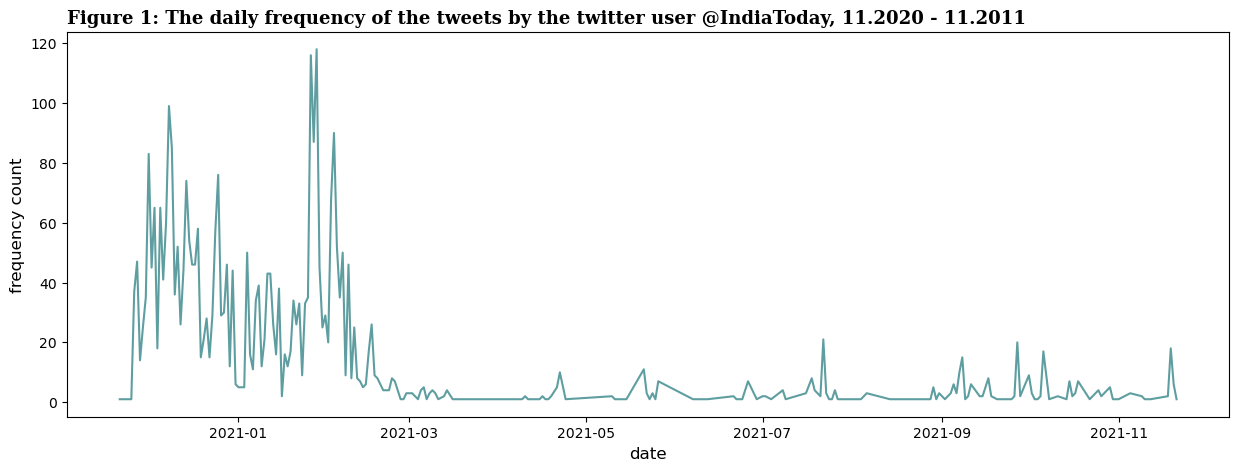

In [71]:
# Creating a variable of tweet frequency.
frequency = df.groupby(['date']).size()

# Plotting a line graph.
fig,ax = plt.subplots(figsize=(15,5))

lineplt = sns.lineplot(data=frequency, color='cadetblue')
lineplt.axes.set_title('Figure 1: The daily frequency of the tweets by the twitter user @IndiaToday, 11.2020 - 11.2011',
                      font='serif',
                      fontsize=13,
                      fontweight='bold',
                      loc='left')
lineplt.set_xlabel('date', fontsize=12)
lineplt.set_ylabel('frequency count', fontsize=12);

*Interpretation:* The first graph I made using the <df> table is a line graph illustrating the frequency of tweets by the user @IndiaToday. The data covered the period from November 2020 to November 2021. I can see from cell 71 that the tweet frequency at the beginning of the time was quite zig-zagged, hitting a high of 115 and a low of 0 tweets per day. But after February 2021, it became more consistent, averaging between 0 and 20 per day for the rest of the period.

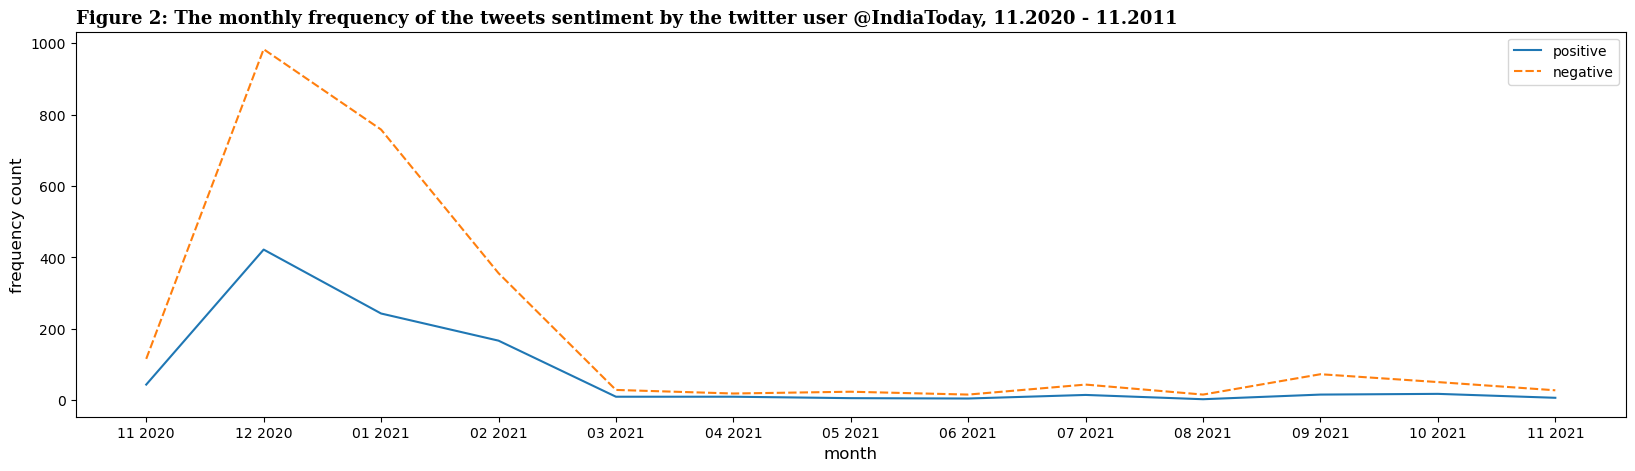

In [72]:
# Adding a new column to DataFrame with month and year input.
df['month'] = df['date'].dt.strftime('%m %Y')

# Separating df by each sentiment.
positive_freq = df[df['sentiment'] == 'positive']
negative_freq = df[df['sentiment'] == 'negative']


# Creating a Pandas Series with frequancy count for each sentiment.
frequency_p = positive_freq.groupby(['month']).size()
frequency_neg = negative_freq.groupby(['month']).size()


# Concatinating separe Series.
new_df = pd.concat([frequency_p, frequency_neg], axis=1)

# Changing index as a column.
new_df = new_df.iloc[[10, 12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,11]]

# Renaming the columns.
new_df.rename(columns = {0: 'positive', 1 : 'negative'}, inplace=True)

# Plotting a line graph.
fig,ax = plt.subplots(figsize=(20,5))

lineplt = sns.lineplot(data=new_df, color='cadetblue')
lineplt.axes.set_title('Figure 2: The monthly frequency of the tweets sentiment by the twitter user @IndiaToday, 11.2020 - 11.2011',
                      font='serif',
                      fontsize=13,
                      fontweight='bold',
                      loc='left')
lineplt.set_xlabel('month', fontsize=12)
lineplt.set_ylabel('frequency count', fontsize=12);

*Interpretation:*The two-line graph shows the frequency of negative and positive tweets of the user @IndiaToday from November 2020 to November 2021. It can be seen that the frequency of each sentiment increased dramatically from November 2020 to December 2020, reaching its peak. The highest number of positive tweets, 400 per month, were tweeted in December 2020, whereas the highest number of negative tweets, almost 1000 per month, were tweeted during the same period. After December 2020, both tweet counts fell gradually, reaching a low in March 2021. There is a slight variation from March 2021 to November 2021, with both averaging 0 to 40 tweets each month. And it is clear that the number of negative tweets was always greater than the number of good tweets over the provided time period. 

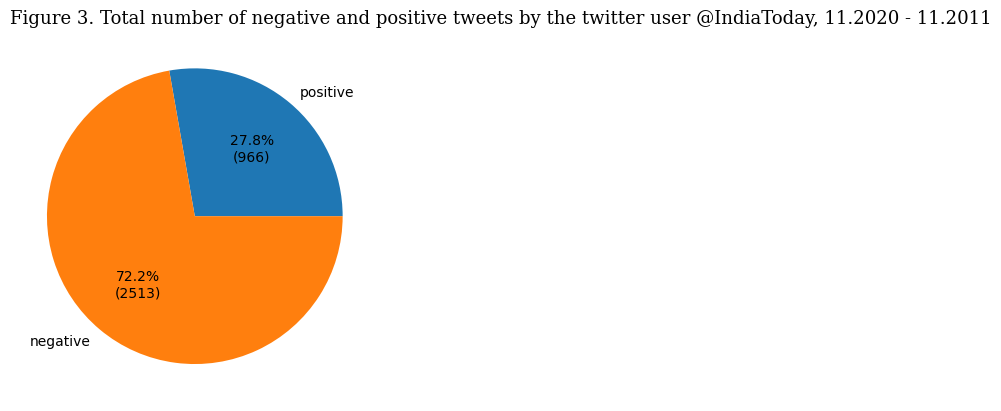

In [73]:
# Plotting a PieChart
numbers = [new_df['positive'].sum(), new_df['negative'].sum()]
labels = ['positive', 'negative']

total = new_df['positive'].sum() + new_df['negative'].sum()
percentages = [number/total * 100 for number in numbers]

plt.pie(numbers, labels=labels, autopct=lambda x: f'{x:.1f}%\n({int(total*x/100)})')
plt.title('Figure 3. Total number of negative and positive tweets by the twitter user @IndiaToday, 11.2020 - 11.2011',
          font='serif',
          fontsize=13,
          loc='left')

plt.show()

*Interpretation:* The pie chart shows the total amount of sentiment tweets by the user @IndiaToday between November 2020 and November 2021. The pie chart showed that negative sentiment outnumbered positive sentiment, with values 2513 and 966, respectively, and it was almost three times greater.

In [75]:
# Creating DataFrame of most liked tweets.
sorted_df_like = df.sort_values(by='liked', ascending=False)
print('The most liked tweet was:', sorted_df_like.iloc[0,1].upper(), '-tweeted on', sorted_df_like.iloc[0,0], '-liked',  sorted_df_like.iloc[0,4], 'times. \n')
print('The second most liked tweet was:', sorted_df_like.iloc[1,1].upper(), '- tweeted on', sorted_df_like.iloc[1,0], '-liked',  sorted_df_like.iloc[1,4], 'times. \n')
print('The third most liked tweet was:', sorted_df_like.iloc[2,1].upper(), '- tweeted on', sorted_df_like.iloc[2,0], '-liked',  sorted_df_like.iloc[2,4], 'times.')

The most liked tweet was: POP STAR EXTENDS SUPPORT TO PROTESTING FARMERS OPPOSES INTERNET SHUTDOWN IN HARYANA INDIA TODAY' GETS US MORE DETAILS WITH  -tweeted on 2021-02-02 00:00:00 -liked 5413 times. 

The second most liked tweet was: MEET BIR 12 YEAR OLD KID FROM JALANDHAR THIS STUDENT OF CLASS 7TH HAS BEEN ATTENDING HIS ONLINE CLASSES FROM SINGHU BORDER IN DELHI WHERE FARMER' PROTESTS ARE GOING ON WATCH THE VIDEO FIND OUT MORE  - tweeted on 2020-12-11 00:00:00 -liked 1796 times. 

The third most liked tweet was:  WHY ARE ACTORS AND SINGERS PARTICIPATING IN FARMERS' PROTESTS ACTOR DEEP SIDHU EXPLAINS IT FULL VIDEO OF WITH  - tweeted on 2020-12-02 00:00:00 -liked 1693 times.


*Interpretation:* In the column above, I executed code to display the three most liked tweets from the user @IndiaToday. On February 2, 2021, the tweet regarding the singer Rihanna had the most likes, with 5414.

In [76]:
# Creating DataFrame of most retweeted tweets.
sorted_df_retweet = df.sort_values(by='retweeted', ascending=False)
print('The most liked tweet was:', sorted_df_retweet.iloc[0,1].upper(), '-tweeted on', sorted_df_retweet.iloc[0,0], '-retweeted',  sorted_df_retweet.iloc[0,3], 'times. \n')
print('The second most liked tweet was:', sorted_df_retweet.iloc[1,1].upper(), '- tweeted on', sorted_df_retweet.iloc[1,0], '-retweeted',  sorted_df_retweet.iloc[1,3], 'times. \n')
print('The third most liked tweet was:', sorted_df_retweet.iloc[2,1].upper(), '- tweeted on', sorted_df_retweet.iloc[2,0], '-retweeted',  sorted_df_retweet.iloc[2,3], 'times.')

The most liked tweet was: POP STAR EXTENDS SUPPORT TO PROTESTING FARMERS OPPOSES INTERNET SHUTDOWN IN HARYANA INDIA TODAY' GETS US MORE DETAILS WITH  -tweeted on 2021-02-02 00:00:00 -retweeted 1332 times. 

The second most liked tweet was: COMMUNICATION SPECIALIST ASMITA GHOSH EXPLAINS WHAT EXACTLY SOCIAL MEDIA 'TOOLKIT' IS ALL ABOUT WATCH WITH LIVE  - tweeted on 2021-02-04 00:00:00 -retweeted 432 times. 

The third most liked tweet was: IS THE OPPOSITION GUILTY OF DUPLICITY ON FARM LAWS HERE' AN ANALYSIS  - tweeted on 2020-12-16 00:00:00 -retweeted 386 times.


*Interpretation:* On the above sell, I executed code to display the three most retweeted tweets from the account @IndiaToday. On the 2nd of February, 2021, the tweet regarding the singer Rihanna tweet had the most retweets with 1332 times.

In [77]:
# Tokenizing the column 'token'.
df['token'] = df['token'].apply(word_tokenize)
all_token_words = [word for tokens in df['token'] for word in tokens]

# Counting word frequencies
word_freq = pd.Series(all_token_words).value_counts()

# Printing top 5 frequent words in all tweets from @IndiaToday.
print('The most frequent word that is used on tweet from the user @India Today was the word:', word_freq.index[0].upper(), '- with the count of:', word_freq[0])
print('The second, third, fourth, fifth the most frequent word that is used on tweet from the user @India Today was the word:', word_freq.index[1].upper(), \
                                                                                                                                 word_freq.index[2].upper(), \
                                                                                                                                  word_freq.index[3].upper(), \
                                                                                                                                  word_freq.index[4].upper(),'- with the count of:',\
      word_freq[1], \
       word_freq[2], \
      word_freq[3], \
        word_freq[4], 'respectively.')

The most frequent word that is used on tweet from the user @India Today was the word: FARMER - with the count of: 2157
The second, third, fourth, fifth the most frequent word that is used on tweet from the user @India Today was the word: PROTEST WATCH DELHI LAW - with the count of: 636 560 475 404 respectively.


*Interpretation:* On above sell I executed code to show the 5 most tokenized tweeted words from the user @IndiaToday. As you can see the Farmer is the most frequent word with the count of 2159 times in total.

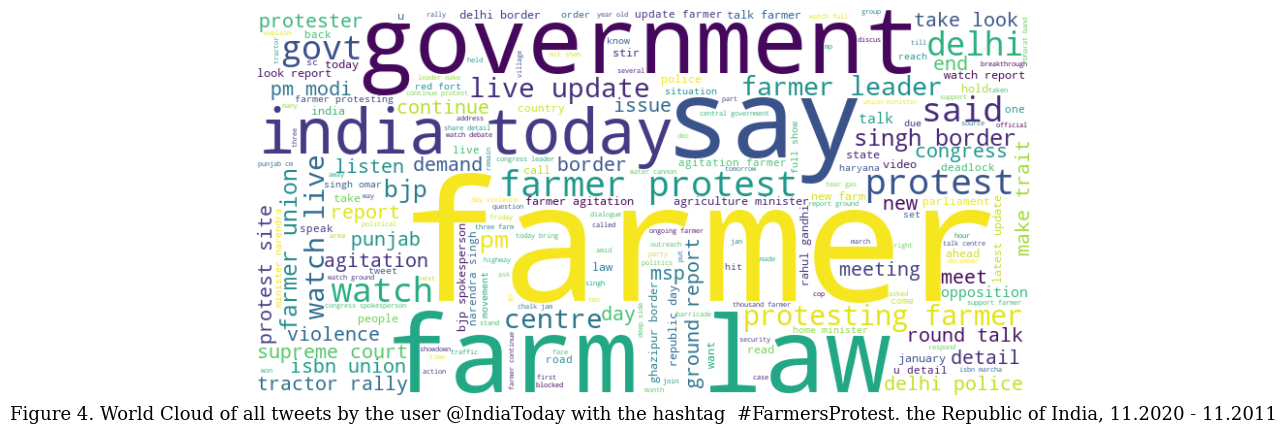

In [78]:
# WordCloud plot for all words.
text = ' '.join(all_token_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Figure 4. World Cloud of all tweets by the user @IndiaToday with the hashtag  #FarmersProtest. the Republic of India, 11.2020 - 11.2011',\
         fontproperties='serif',
         fontsize=13,
         y=-0.08)
plt.show()

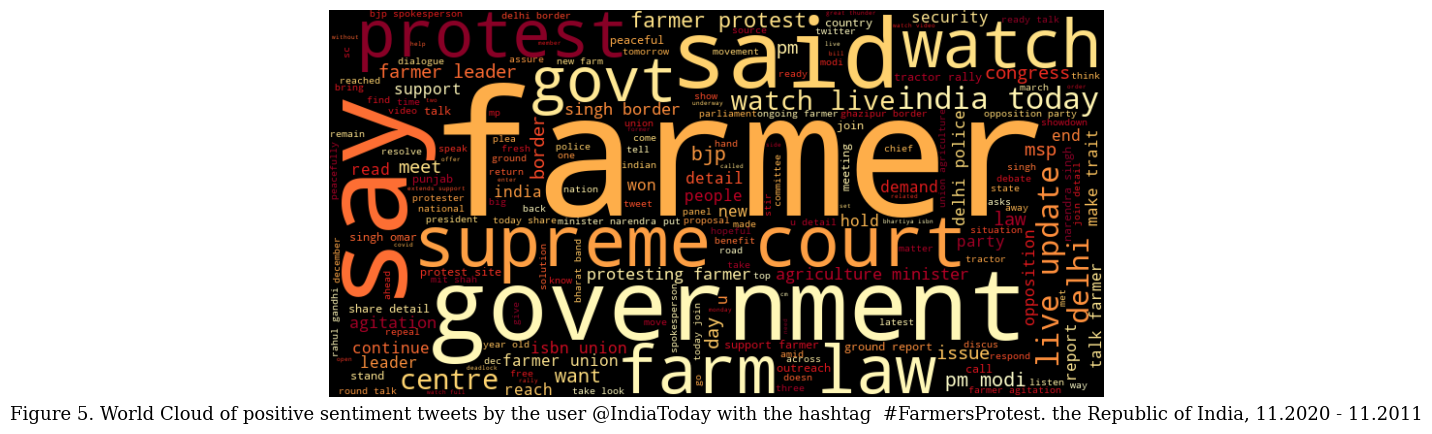

In [79]:
# WordCloud plot for positive sentiment tokens.
positive_freq['token'] = positive_freq['token'].apply(word_tokenize)
all_pos_tokens = [word for tokens in positive_freq['token'] for word in tokens]
text = ' '.join(all_pos_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='YlOrRd').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Figure 5. World Cloud of positive sentiment tweets by the user @IndiaToday with the hashtag  #FarmersProtest. the Republic of India, 11.2020 - 11.2011',\
         fontproperties='serif',
         fontsize=13,
         y=-0.08)
plt.show()

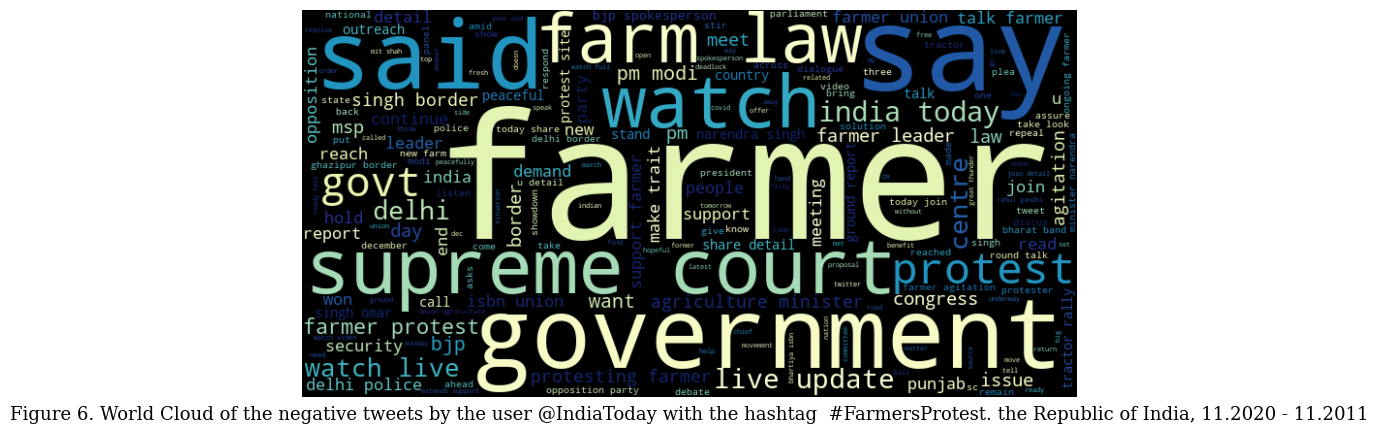

In [80]:
# WordCloud plot for negative sentiment tokens.
negative_freq['token'] = negative_freq['token'].apply(word_tokenize)
all_neg_tokens = [word for tokens in negative_freq['token'] for word in tokens]
text = ' '.join(all_pos_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='YlGnBu').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.title('Figure 6. World Cloud of the negative tweets by the user @IndiaToday with the hashtag  #FarmersProtest. the Republic of India, 11.2020 - 11.2011',\
         fontproperties='serif',
         fontsize=13,
         y=-0.08)
plt.show;

### *4.2 Forecasting using ARIMA model*

I wanted to experiment with my data using the ARIMA model for forecasting because it is one of the most popular and powerful forecasting methods. ARIMA, which stands for AutoRegressive Integrated Moving Average, captures data patterns, trends, and seasonality by combining prior values, differences, and errors. The ARIMA model has the advantage of being versatile and able to handle a wide range of time series data as long as they are univariate. However, before using it, I had to double-check my data to ensure the model could be applied to it.

#### *laoding and examining dataset*

First, I prepared the data for the analysis, so I converted my prior PySpark data frame into Pandas and made some minor changes. Such as removing all unnecessary columns, renaming column names, changing the data type to an appropriate one, and removing the last five digits from date column values. After reviewing the results, I saw that the new data consisted of one column called "polarity" and an index called "date."

In [81]:
# Creating a new DataFrame for timerseries model.
df_timeseries = df_spark_sentiment.toPandas()
df_timeseries = df_timeseries[['date', 'sentiment_polarity']]
df_timeseries.rename(columns={'sentiment_polarity' : 'polarity'}, inplace=True)
df_timeseries['polarity'] = df_timeseries['polarity'].astype(float)

# Removing +00:-00 from the the values of the column date.
def extract_date(val):
    new_val = val[0:19]
    return new_val
df_timeseries['date'] = df_timeseries['date'].apply(extract_date)

# Making the 'date' column as an index.
df_timeseries.set_index('date', inplace=True)

In [82]:
# Checking the changes.
df_timeseries.head(10)

,polarity
date,
2020-11-21 11:04:03,-0.1280
2020-11-25 09:38:38,0.0000
2020-11-26 04:14:59,0.0000
2020-11-26 05:04:40,0.0000
2020-11-26 05:07:16,-0.4404
2020-11-26 05:13:06,0.3612
2020-11-26 05:21:12,-0.5574
2020-11-26 05:27:52,-0.2960
2020-11-26 05:29:52,0.1027


The next step is to examine the data. I plotted the data to see how it looked, and the plot seemed pretty stationary. I did the augmented Dickey-Fuller (ADF) test on the data to confirm my hypothesis, and the P-value result and the ADF values indicated the same. The ADF test number was -6.5, which is way lower than zero, and the P-value of 1.2288184623591962e-08 is very little, less than the significance level. And it confirms my hypothesis: the data is stationary, allowing me to apply the ARIMA model to it.

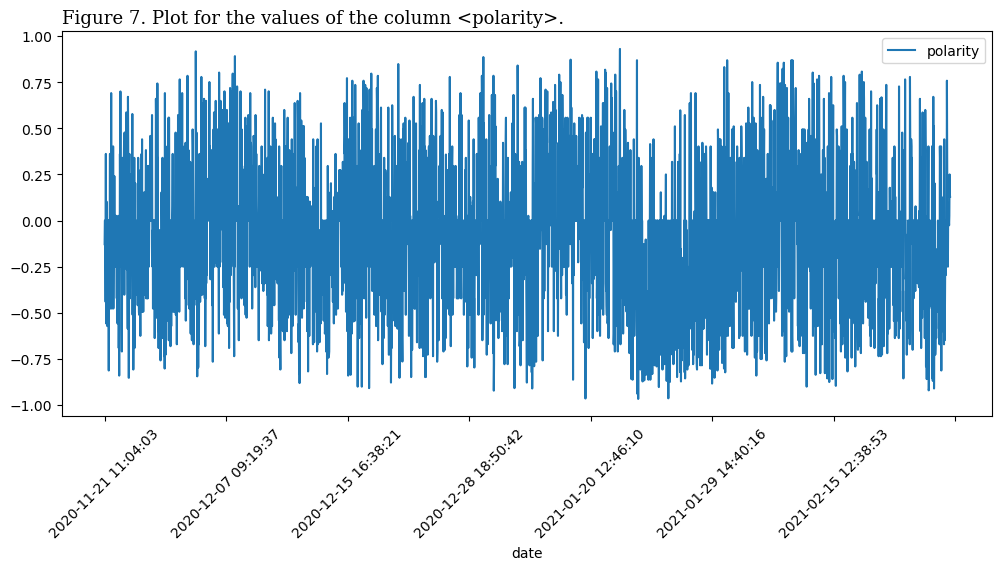

In [83]:
# Checking the data.
df_timeseries.plot(figsize=(12,5))
plt.xticks(rotation=45)
plt.title('Figure 7. Plot for the values of the column <polarity>.',
          font='serif',
          fontsize=13,
          loc='left');

In [84]:
# Stationary check.
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('1.ADF: ', dftest[0])
    print('2.P-Value: ', dftest[1])
    print('3.Num of lags: ', dftest[2])
    print('4.Num of observations used for ADF regression and cricital values calculation :', dftest[3])
    print('5.Critical Values: ')
    for key, val in dftest[4].items():
        print('\t', key, ': ', val)
        
# Testing stationary check.
ad_test(df_timeseries['polarity'])

1.ADF:  -6.490690939996866
2.P-Value:  1.2288184623591962e-08
3.Num of lags:  26
4.Num of observations used for ADF regression and cricital values calculation : 3452
5.Critical Values: 
	 1% :  -3.432245761690094
	 5% :  -2.8623776390195377
	 10% :  -2.5672158904203854


I need to identify the best ARIMA parameters before training the model. I used the <auto_arima> function from the <pmdarima> library, and the results showed that the optimal order for the number of autoregressive terms (p), differences (d), and moving average terms (q) is (1,1,1), with the lowest AIC 2921.637. Moreover, the seasonality value (0,0,0) from the test proved again that the ARIMA model can be applied to the data set because there is no seasonality in it.

In [85]:
# Figuring out order for ARIMA model.
stepwise_fit = auto_arima(df_timeseries['polarity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2926.779, Time=2.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5132.001, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4157.922, Time=0.91 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2924.060, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5130.001, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2923.637, Time=1.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2924.575, Time=2.72 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2925.913, Time=1.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2923.722, Time=1.72 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3778.080, Time=0.84 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2921.637, Time=1.62 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2922.061, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4155.922, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2922.576, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3479
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1457.819
Date:                Wed, 31 May 2023   AIC                           2921.637
Time:                        14:28:30   BIC                           2940.100
Sample:                             0   HQIC                          2928.228
                               - 3479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0274      0.016      1.668      0.095      -0.005       0.060
ma.L1         -0.9706      0.004   -232.135      0.000      -0.979      -0.962
sigma2         0.1353      0.004     38.231      0.000       0.128       0.142
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                25.73
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### *train test split*

I had some difficulty with the splitting and training parts. The values are fine because they range from -1 to 1, so no normalization or transformation techniques are required. However, the frequency of tweets, or the index values of this data set, is challenging. Figure 2 shows that tweets were quite active at the start of the period, then dropped practically to 0 and stayed constant, ranging from 0 to 20 tweets per day until the end of the period. There were several gaps between the records; in other words, there was no consistent interval ranging from a fraction of a second to a daily, weekly, or monthly period. I couldn't do anything in this case. Perhaps I could use forward or backward filling methods, or any other technique, to fill the blank gap. However, in my opinion, it would make my project worthless. So, I decided to maintain the data as is but test it with fewer values, giving 30 values for prediction.

In [87]:
# Train test split.
print(df_timeseries.shape)
train_data = df_timeseries.iloc[:-30]
test_data = df_timeseries.iloc[-30:]
print(train_data.shape, test_data.shape)

(3479, 1)
(3449, 1) (30, 1)


#### *training and fitting the model*

For the training model we are using (1,1,1) order.

In [88]:
# Training the model
model = ARIMA(train_data['polarity'], order=(1,1,1))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:               polarity   No. Observations:                 3449
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1449.353
Date:                Wed, 31 May 2023   AIC                           2904.705
Time:                        14:43:17   BIC                           2923.142
Sample:                             0   HQIC                          2911.290
                               - 3449                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.017      1.574      0.116      -0.006       0.058
ma.L1         -0.9710      0.004   -234.882      0.000      -0.979      -0.963
sigma2         0.1356      0.004     37.957      0.0

#### *testing*

In [89]:
# Making predictions on the set.
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
pred = model.predict(start=start_index, end=end_index, typ ='levels')

pred.index = df_timeseries.index[start_index:end_index+1]
print(pred)

date
2021-11-09 15:39:31   -0.199538
2021-11-10 05:27:16   -0.203388
2021-11-12 04:02:57   -0.203488
2021-11-18 03:08:47   -0.203491
2021-11-18 18:40:26   -0.203491
2021-11-19 02:42:30   -0.203491
2021-11-19 04:39:11   -0.203491
2021-11-19 05:13:44   -0.203491
2021-11-19 05:57:43   -0.203491
2021-11-19 06:02:02   -0.203491
2021-11-19 06:04:38   -0.203491
2021-11-19 06:12:28   -0.203491
2021-11-19 08:00:20   -0.203491
2021-11-19 08:31:39   -0.203491
2021-11-19 08:52:04   -0.203491
2021-11-19 08:55:02   -0.203491
2021-11-19 09:08:35   -0.203491
2021-11-19 09:19:02   -0.203491
2021-11-19 09:23:42   -0.203491
2021-11-19 12:43:40   -0.203491
2021-11-19 15:59:22   -0.203491
2021-11-19 18:08:58   -0.203491
2021-11-19 18:21:44   -0.203491
2021-11-20 07:34:12   -0.203491
2021-11-20 08:44:46   -0.203491
2021-11-20 10:37:54   -0.203491
2021-11-20 12:20:36   -0.203491
2021-11-20 16:41:12   -0.203491
2021-11-20 17:53:47   -0.203491
2021-11-21 01:00:01   -0.203491
Name: predicted_mean, dtype: float6

In [1]:
# Plotting the test.
pred.plot(legend=True)
test_data['polarity'].plot(legend=True)
plt.xticks(rotation=45)
plt.title('Figure 8. Predicted and Original values of the dataset using ARIMA model.',
          fontsize=13,
          loc='left');

NameError: name 'pred' is not defined

#### *interpretation*

*Interpretation:* The ARIMA model was then trained and tested with the parameters (1,1,1). The outcome only displayed the average of my historical data on forecasting test values. And when I plotted it, I got a straight line. Based on my knowledge, there is no information to learn when the data collection lacks any seasonality or trends. As a result, the model cannot be accurate. I refer it to the the date's blank gap. And if the protest continued, I could suggest that the average sentiment of tweets from user @IndiaToday would be negative, with a score around -0.203491.